### **Import Needed Libraries**

In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### **Read Data**

In [58]:
df = pd.read_csv(r'C:\Users\DELL 7510\Downloads\AMIT-AI.Tasks\Ecommerce Customers.csv')

**Plot Head of Data Items**

In [59]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**Get Data Info**

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


**Get Statistical Analysis**

In [61]:
df[['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']].describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### **Exploratory Data Analysis (EDA)**

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

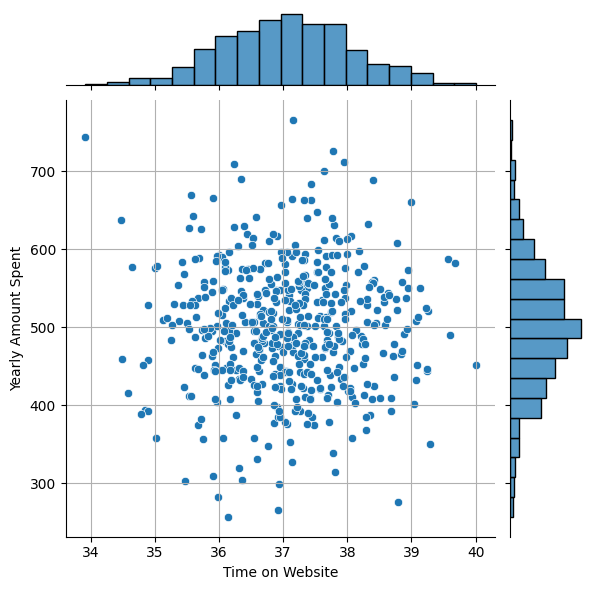

In [62]:
sns.jointplot(data=df , x='Time on Website' , y='Yearly Amount Spent',kind='scatter')
plt.grid(True)

**Do the same but with the Time on App column instead.**

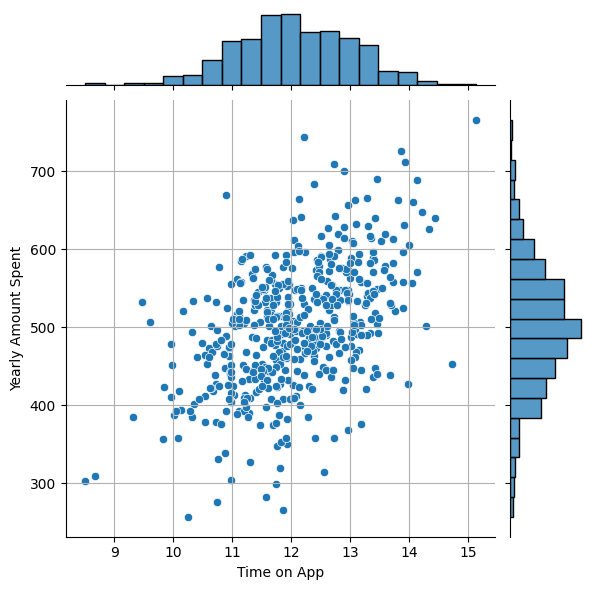

In [85]:
sns.jointplot(data=df,x='Time on App',y='Yearly Amount Spent',kind="scatter")
plt.grid(True)

**Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

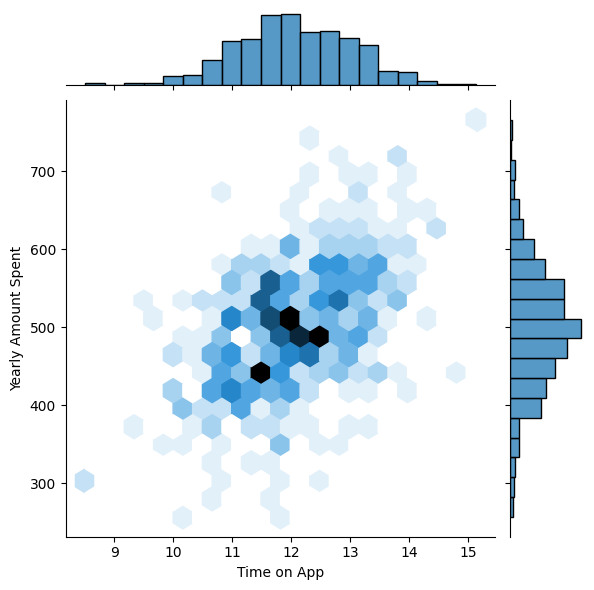

In [64]:
sns.jointplot(data=df,x='Time on App',y='Yearly Amount Spent',kind="hex")


**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

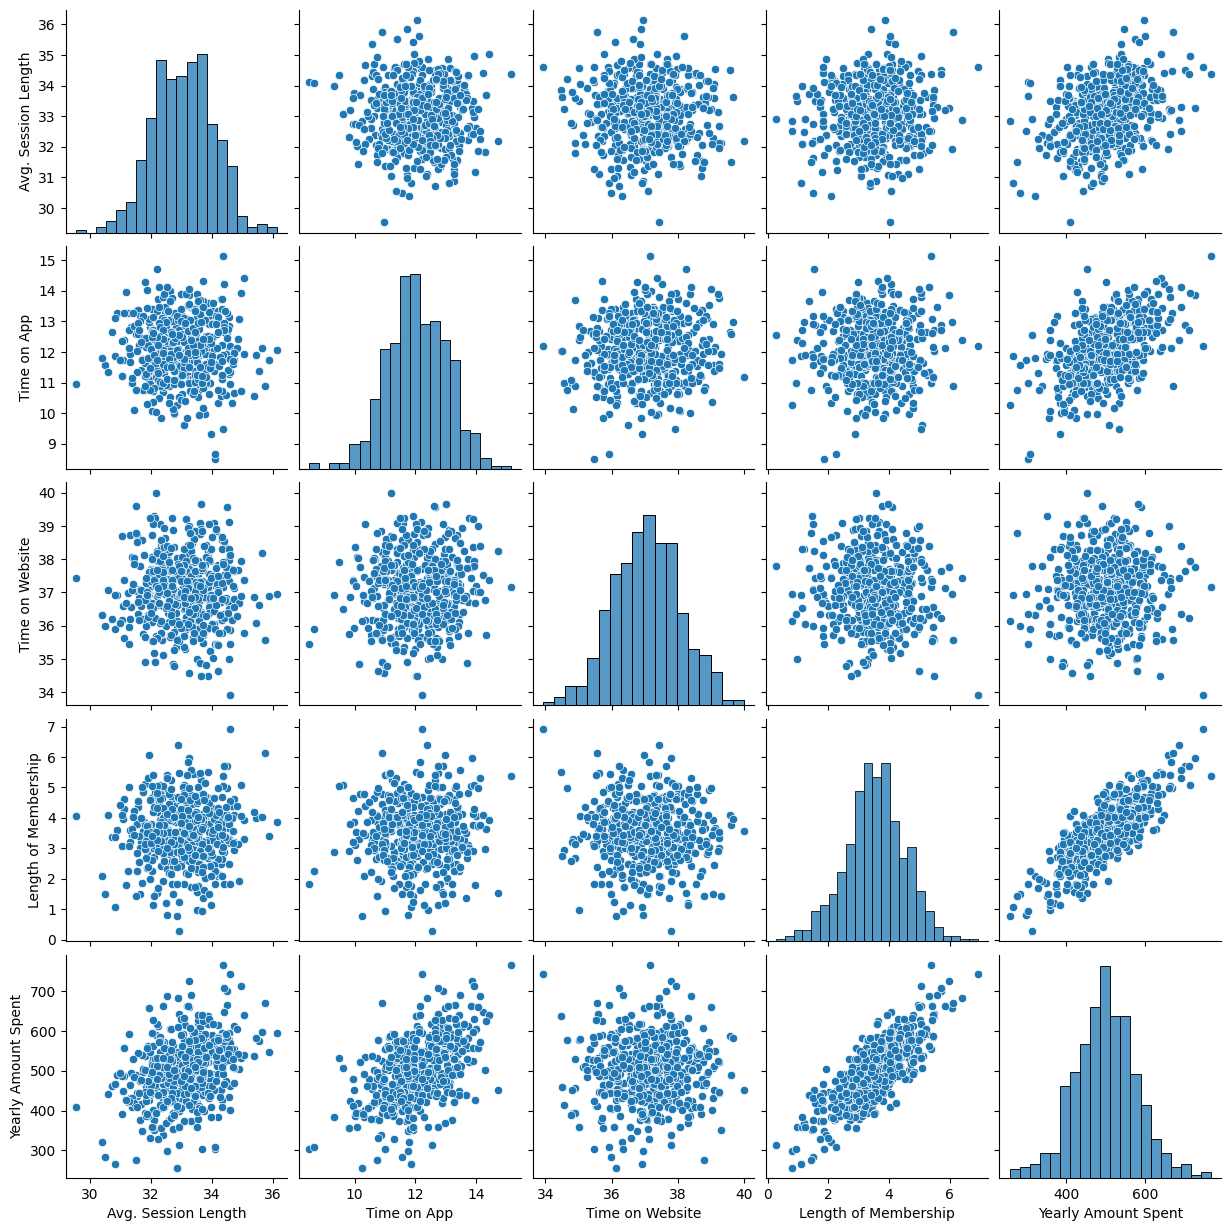

In [65]:
sns.pairplot(df)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [66]:
correlation=df[['Avg. Session Length'	,"Time on App"	,'Time on Website'	,'Length of Membership'	,'Yearly Amount Spent']].corr()
correlation

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.**

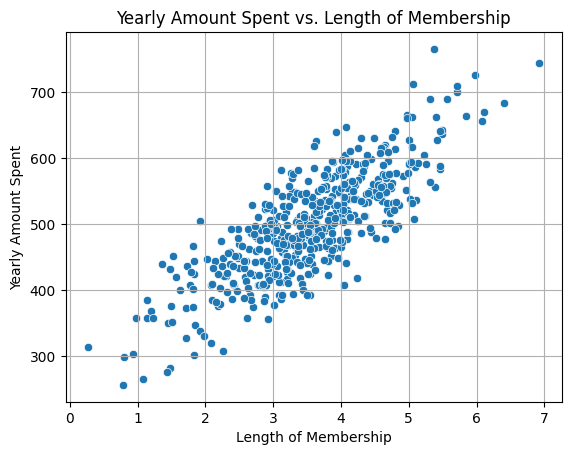

In [67]:
sns.scatterplot(x='Length of Membership', y='Yearly Amount Spent', data=df)
plt.title('Yearly Amount Spent vs. Length of Membership')
plt.xlabel('Length of Membership')
plt.ylabel('Yearly Amount Spent')
plt.grid(True)
plt.show()

### **Data Prerprocessing**

**Define Features X and Target y**
- Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [68]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [69]:
X = df.loc[: , ['Avg. Session Length',	'Time on App',	'Time on Website',	'Length of Membership']]
y = df.loc[: , 'Yearly Amount Spent']

**Data Splitting**
- Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [70]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=101)

### **Machine Learning Algorithms**

**Linear Regression**

In [71]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

**Print Model Score**

In [72]:
model.score(X_train,y_train)

0.9817562058732432

**Get Prediction**

In [73]:
y_pred = model.predict(X_test)

**Print MAE**

In [74]:
print(mean_absolute_error(y_test,y_pred))

7.228148653430826


**Print MSE**

In [75]:
print(mean_squared_error(y_test,y_pred))

79.81305165097427


**Plotting real test values vs predicted values**

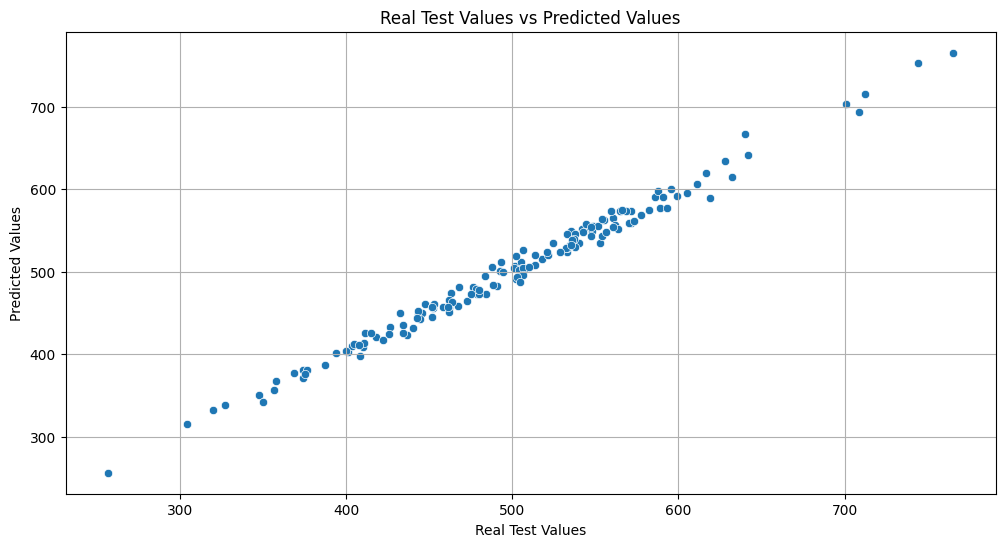

In [76]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Real Test Values vs Predicted Values')
plt.xlabel('Real Test Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

**Create a DataFrame to display the Linear Regression Coefficients**

In [77]:
conefficents = model.coef_

**SGDRegressor**

In [78]:
model2 = SGDRegressor(eta0=0.12, random_state=42, learning_rate='constant')
model2.fit(X_train,y_train)

SGDRegressor(eta0=0.12, learning_rate='constant', random_state=42)

**Print Model Score**

In [79]:
model2.score(X_train,y_train)

-1.1817832066840041e+24

**Get Prediction**

In [80]:
y_pred = model2.predict(X_test)

**Print MAE**

In [81]:
print(mean_absolute_error(y_test,y_pred))

83589099756845.89


**Print MSE**

In [82]:
print(mean_squared_error(y_test,y_pred))

7.040301255076675e+27


**Plotting real test values vs predicted values**

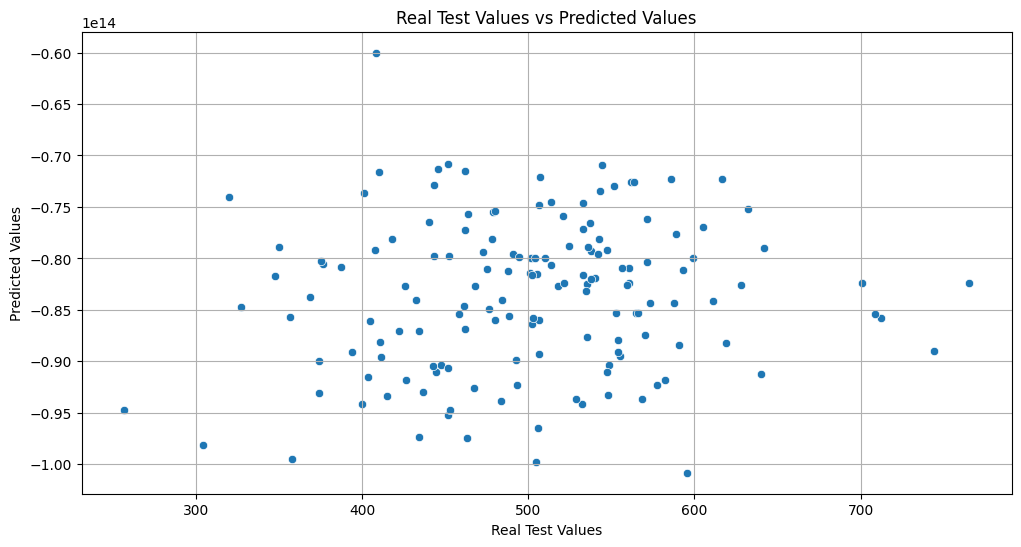

In [83]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Real Test Values vs Predicted Values')
plt.xlabel('Real Test Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

**Create a DataFrame to display the Linear Regression Coefficients**

In [84]:
conefficents = model2.coef_
conefficents

array([-6.02043344e+12,  7.18213179e+11,  2.57566652e+12,  3.37680807e+12])